# Trend and Seasonality in Time Data

Goals:
+ Understand trend and seasonality.
    + Stationarity, trend, and exception
    + Stationarity versus seasonality
+ Look for trend and seasonality.
+ Look for the degree of a trend.
+ Look for the period of a season.
+ Remove trend from data

Technicals:
+ Moving averages (SMA, EMA)
+ lag_plot, autocorelation plot
+ Differencing (diff)
+ Decomposing trend and seasonality (seasonal_decompose, STL)

Data:
+ random data
+ airline passengers
+ stocks
+ temperatures

Review:
+ Date range selection
+ Resample (and aggregate)

In [1]:
import numpy, pandas 
from pandas.plotting import autocorrelation_plot, lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# financial time series data
apple = pandas.read_csv('../Datasets/AAPL.csv', index_col='Date', parse_dates=['Date'])

# consumer time series data
passengers = pandas.read_csv('../Datasets/international-airline-passengers.csv', index_col='Month', parse_dates=['Month'])

# natural/physical time series data
temperatures = pandas.read_csv('../Datasets/daily-min-temperatures.csv', index_col='Date', parse_dates=['Date'])

ts = pandas.DataFrame()
ts['random'] = [ numpy.random.random() for i in range(200) ]
ts['quadratic'] = [ i*i for i in range(200) ]

### Trend and Seasonality

There are 3 components in a time series: (1) trend, (2) stationarity, and (3) exceptions.

What is a trend?
+ tendency (consistent pattern) to go up and down.
+ something that is happening lately.  There's some relationship/dependency to the recent past behavior.

What is stationarity?
+ a behavior that doesn't change in time.
    + mathematically, (1) constant mean, and possibly (2) constant variance.
    
How is stationarity different from seasonality?
+ Seasonality means stationarity. The constant behavior repeats in time.

We're interested in understanding about trend and seasonality of a time series. Further, we are also interested in what is not explained by trend and seasonality.  These are these exceptions.

Is there a trend in the temperature data?  Perhaps not?  Maybe.

We see a clear indication of seasonality, a behavior that repeats itself in time.

<AxesSubplot:xlabel='Date'>

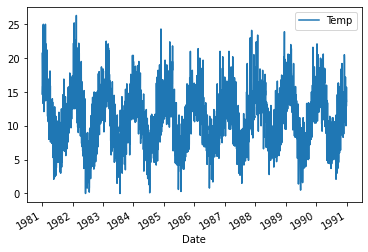

In [5]:
temperatures.plot()

### Understanding, Detecting Trends 

<AxesSubplot:xlabel='Month'>

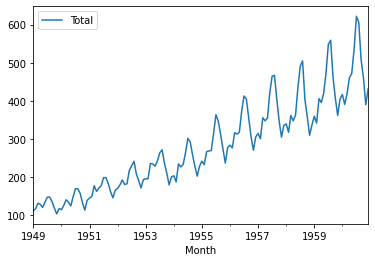

In [6]:
passengers.plot()

Perhaps, the simplest way to detect a trend is to smooth out the data. Date smoothing kinda removes the noises.

In [7]:
passengers[0:10]

,Total
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


The simplest way to smooth the data is to average rolling windows.  This is called Simple Moving Average (SMA).

<AxesSubplot:xlabel='Month'>

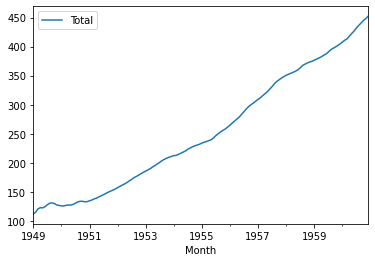

In [8]:
SMA = passengers.rolling(24, min_periods=1).mean()
SMA.plot()

Sometimes, we want more weight on the recent data.   Data is $\{x_0, x_1, \cdots, ...\}$

$E_t = \alpha \cdot x_{t} + (1-\alpha) \cdot E_{t-1}$

This is an exponential moving average (EMA).

In [54]:
passengers.rolling(window = 20, min_periods=1).mean()

,Total
Month,
1949-01-01,112.000000
1949-02-01,115.000000
1949-03-01,120.666667
1949-04-01,122.750000
1949-05-01,122.400000
...,...
1960-08-01,453.150000
1960-09-01,460.550000
1960-10-01,466.500000


In [55]:
passengers[:5]

,Total
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

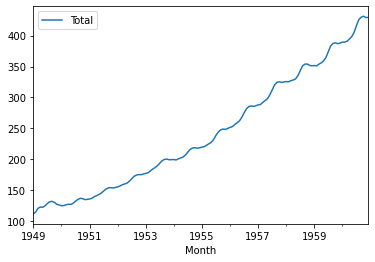

In [9]:
EMA = passengers.ewm(alpha=0.05).mean()
EMA.plot()

<AxesSubplot:xlabel='Month'>

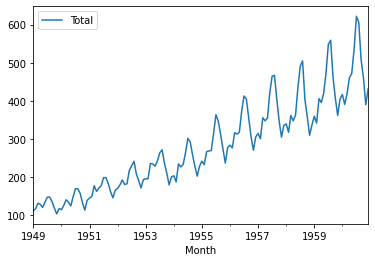

In [10]:
passengers.plot()

apple stock prices.

Is there a trend?

<AxesSubplot:xlabel='Date'>

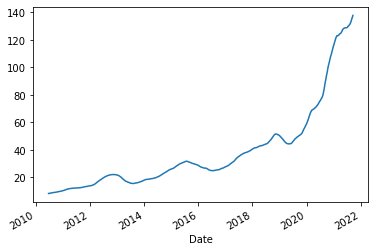

In [11]:
apple.Close.rolling(20*6).mean().plot()

Is there a trend in the temperatures data?

<AxesSubplot:xlabel='Date'>

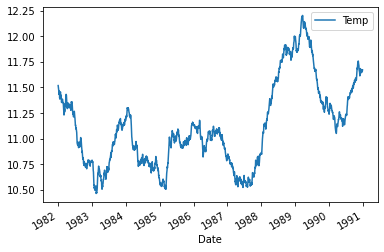

In [12]:
temperatures.rolling(365).mean().plot()

<AxesSubplot:xlabel='Date'>

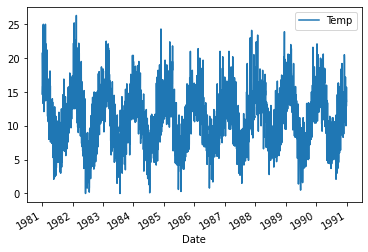

In [13]:
temperatures.plot()

### Seasonality

How do we detect seasonality in time series data?

<AxesSubplot:xlabel='Date'>

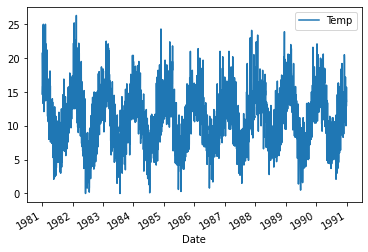

In [14]:
temperatures.plot()

period around 12 months (365).

<AxesSubplot:xlabel='Month'>

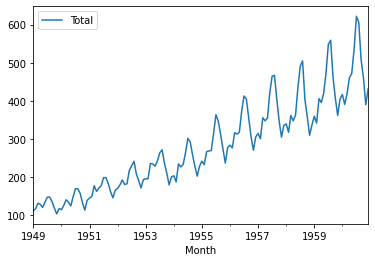

In [15]:
passengers.plot()

Seasonality suggests that there is $period$ in time, after which the behabior repeats.

period is around 12.

To see how strong seasonality, we can correlate $x_t$ and $x_{t + p}$.

The lag_plot visualizes the correlation between $x_t$ and $x_{t+lag}$.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

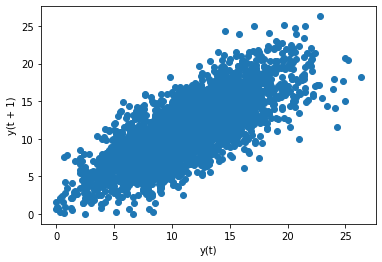

In [16]:
lag_plot(temperatures, lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 365)'>

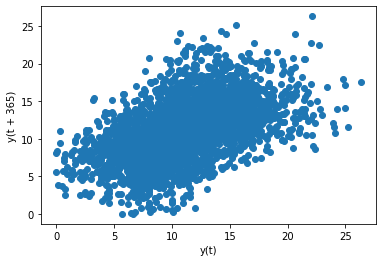

In [17]:
lag_plot(temperatures, lag=365)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

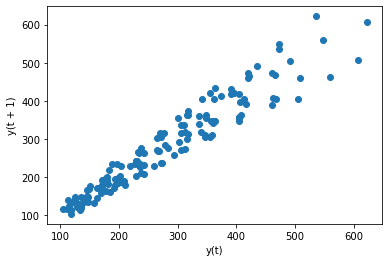

In [18]:
lag_plot(passengers, lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

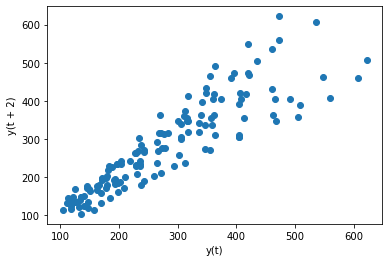

In [19]:
lag_plot(passengers, lag=2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

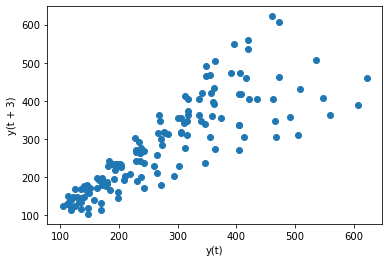

In [20]:
lag_plot(passengers, lag=3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 12)'>

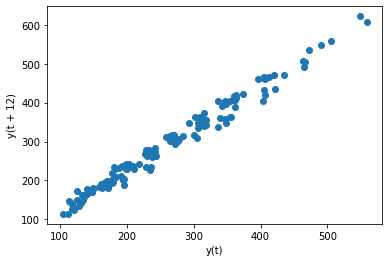

In [21]:
lag_plot(passengers, lag=12)

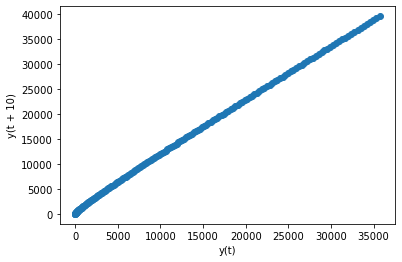

In [22]:
lag_plot(ts['quadratic'], lag=10);


### Autocorrelation

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 13)'>

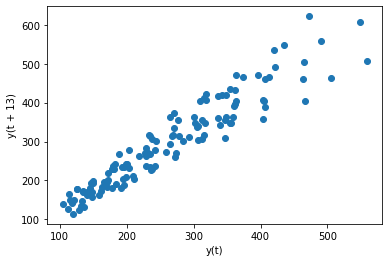

In [23]:
lag_plot(passengers, lag=13)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

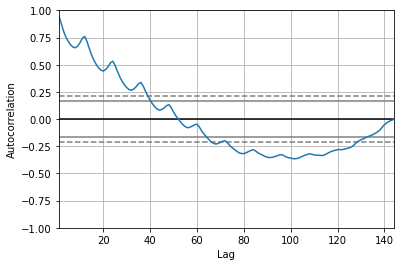

In [24]:
autocorrelation_plot(passengers)

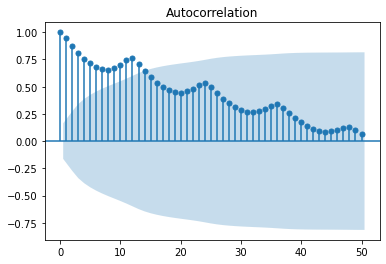

In [25]:
plot_acf(passengers, lags=50);

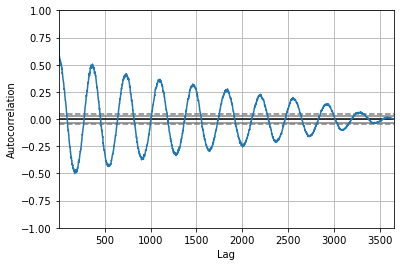

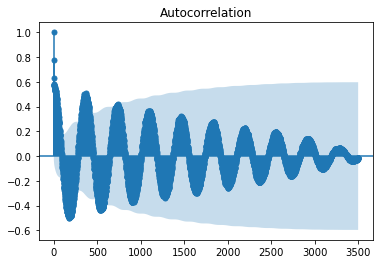

In [49]:
autocorrelation_plot(temperatures)
plot_acf(temperatures, lags = 3500);

<AxesSubplot:title={'center':'Autocorrelation'}, xlabel='Lag', ylabel='Autocorrelation'>

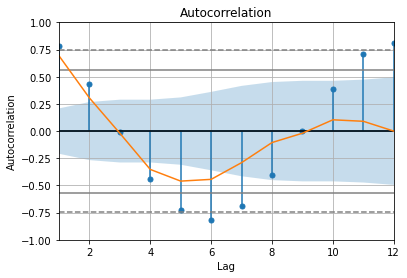

In [52]:
plot_acf(temperatures.resample('M').mean(), lags = 12);
autocorrelation_plot(temperatures.resample('M').mean()[:12])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

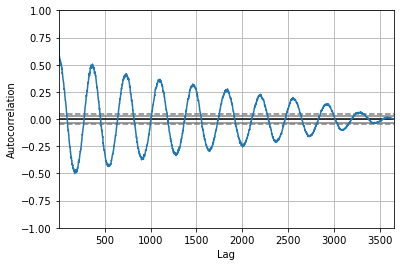

In [46]:
autocorrelation_plot(temperatures)

- temperature_t -- the original data

- temperature_t+365 -- has 365 data points fewer.


<AxesSubplot:>

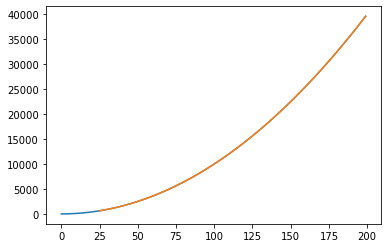

In [27]:
ts['quadratic'].plot()
ts['quadratic'][25:].plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

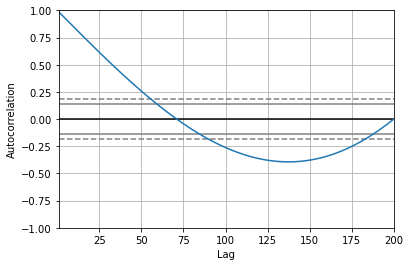

In [28]:
autocorrelation_plot(ts['quadratic'])

A time series that is purely trendy looks like this of ts['quadratic'].

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

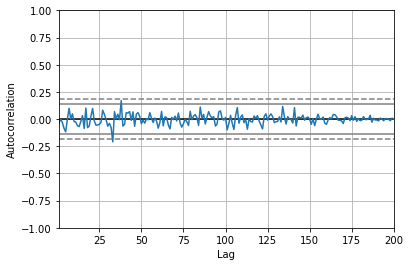

In [29]:
autocorrelation_plot(ts['random'])

Trend + seasonality looks like this

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

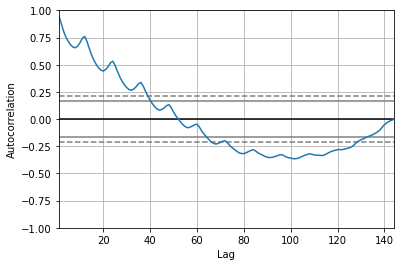

In [30]:
autocorrelation_plot(passengers)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

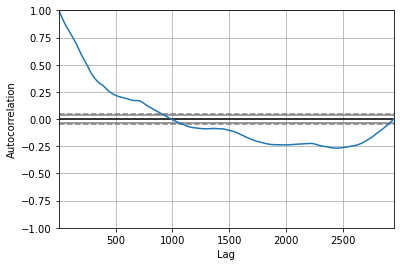

In [31]:
autocorrelation_plot(apple.Close)

The plot suggests that apple time series is completely trendy. Is this true?

### Decompose trend and seasonality

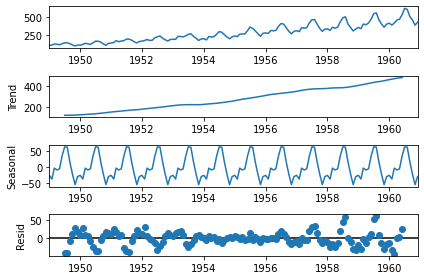

In [32]:
result = seasonal_decompose(passengers, model='additive')
result.plot();

<AxesSubplot:xlabel='Month'>

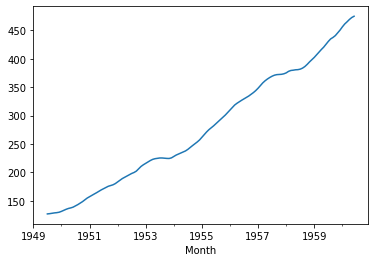

In [33]:
result.trend.plot()

<AxesSubplot:xlabel='Month'>

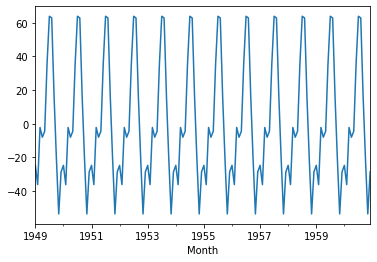

In [32]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

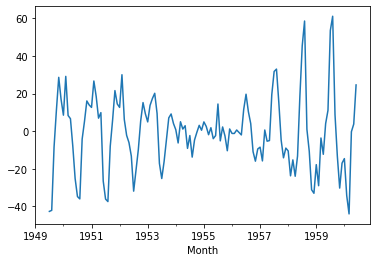

In [35]:
result.resid.plot()